### 回收不表

#### 不表1： 交叉验证

交叉验证的核心本质：  
将数据集划分为训练集和验证集，多次重复训练和评估，最终得到更稳健的模型性能评估结果，它不依赖于任务类型，只关注 “如何公平、准确地评估模型”  
依然以lecture的糖尿病人为例

In [1]:
#加载sklearn内置数据集
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 适配Mac
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [2]:
diabetes=load_diabetes()
print(diabetes.keys())
df = pd.DataFrame(
    data=diabetes.data, 
    columns=diabetes.feature_names  
)
#补充target列
df['target'] = diabetes.target
df.head()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
from sklearn.preprocessing import StandardScaler
#对target列进行标准化
scaler = StandardScaler()
scaler.fit(df[['target']])
df['target'] = scaler.transform(df[['target']])
print(df['target'].head())
df.head()


0   -0.014719
1   -1.001659
2   -0.144580
3    0.699513
4   -0.222496
Name: target, dtype: float64


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,-0.014719
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,-1.001659
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,-0.144580
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,0.699513
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,-0.222496


In [4]:
#划分数据集
from sklearn.model_selection import train_test_split

X=df.drop('target', axis=1)
y=df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# 原有单次划分的评估
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 单次划分训练/测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型并评估
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_single = mean_squared_error(y_test, y_pred)
r2_single = r2_score(y_test, y_pred)

print("\n===== 单次划分（train_test_split）评估结果 =====")
print(f"测试集 MSE：{mse_single:.2f}，R²：{r2_single:.2f}")


===== 单次划分（train_test_split）评估结果 =====
测试集 MSE：0.49，R²：0.45


下面是采用交叉验证


===== 5折交叉验证评估结果 =====
各折MSE：[0.47 0.51 0.55 0.51 0.49]
交叉验证平均MSE：0.50 ± 0.03

各折R²：[0.43 0.52 0.48 0.43 0.55]
交叉验证平均R²：0.48 ± 0.05


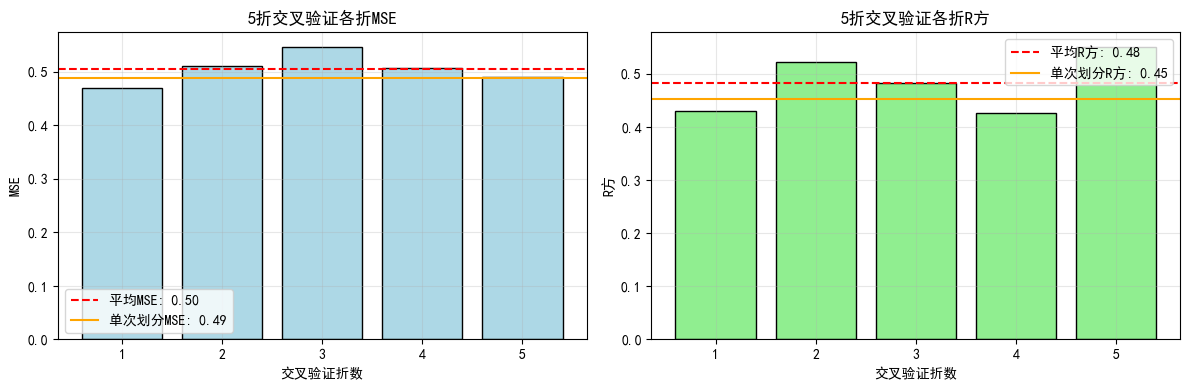

In [6]:
from sklearn.model_selection import cross_val_score
cv_mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# 转换MSE为正值，并计算均值和标准差
cv_mse = -cv_mse_scores
cv_mse_mean = np.mean(cv_mse)
cv_mse_std = np.std(cv_mse)
cv_r2_mean = np.mean(cv_r2_scores)
cv_r2_std = np.std(cv_r2_scores)

print("\n===== 5折交叉验证评估结果 =====")
print(f"各折MSE：{cv_mse.round(2)}")
print(f"交叉验证平均MSE：{cv_mse_mean:.2f} ± {cv_mse_std:.2f}")
print(f"\n各折R²：{cv_r2_scores.round(2)}")
print(f"交叉验证平均R²：{cv_r2_mean:.2f} ± {cv_r2_std:.2f}")

plt.figure(figsize=(12, 4))

# 各折MSE对比
plt.subplot(1, 2, 1)
plt.bar(range(1, 6), cv_mse, color='lightblue', edgecolor='black')
plt.axhline(y=cv_mse_mean, color='red', linestyle='--', label=f'平均MSE: {cv_mse_mean:.2f}')
plt.axhline(y=mse_single, color='orange', linestyle='-', label=f'单次划分MSE: {mse_single:.2f}')
plt.xlabel("交叉验证折数")
plt.ylabel("MSE")
plt.title("5折交叉验证各折MSE")
plt.legend()
plt.grid(alpha=0.3)

# 各折R²对比
plt.subplot(1, 2, 2)
plt.bar(range(1, 6), cv_r2_scores, color='lightgreen', edgecolor='black')
plt.axhline(y=cv_r2_mean, color='red', linestyle='--', label=f'平均R方: {cv_r2_mean:.2f}')
plt.axhline(y=r2_single, color='orange', linestyle='-', label=f'单次划分R方: {r2_single:.2f}')
plt.xlabel("交叉验证折数")
plt.ylabel("R方")
plt.title("5折交叉验证各折R方")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

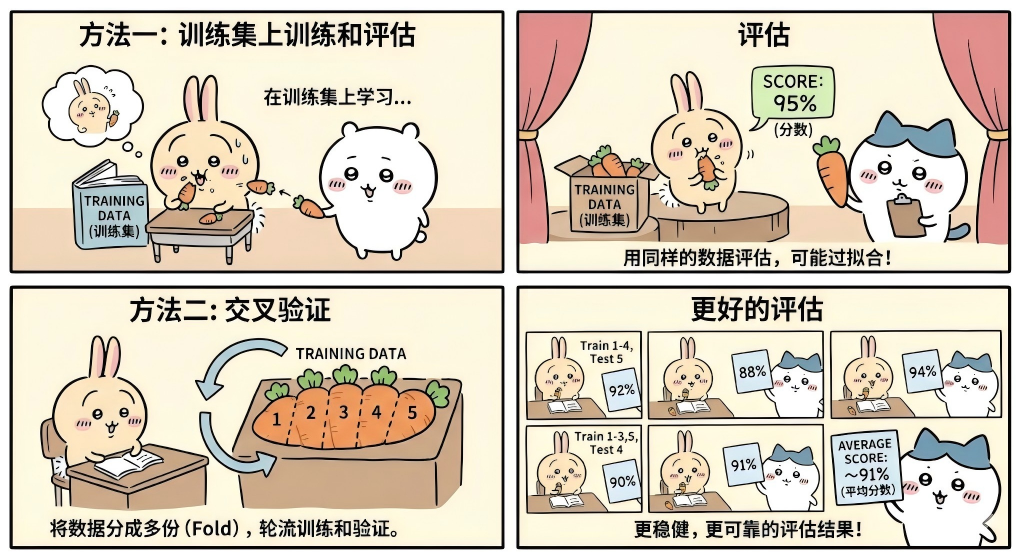

#### 不表2：微调模型（寻找最优超参数）  
先前梯度下降的例子中，学习率和训练批次是我们手动设置的，那么有什么方法可以让我们自己来选择这些超参数呢？  
超参数寻优的效果在本节可能无法详细体现，以后会详细讲解


由于普通线性回归没有什么超参数可以调整  
因此，我们采用岭回归  （Regression部分进行详细介绍）
岭回归中的核心超参数为  
alpha 为正则化参数，表示正则化程度，值越大越难拟合  
fit_intercept 为是否考虑截距项  
solver 为求解方程的算法，可选值有 ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’等


1） 网格搜索  

通过定义参数空间，对模型进行参数优化，并选择最佳参数

In [7]:

from tqdm import tqdm
tqdm.pandas()
# ========== 网格搜索超参数寻优 ==========
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')  # 忽略无关警告

# 定义模型和超参数网格
model = Ridge()
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky']
}

from sklearn.model_selection import ParameterGrid
param_combinations = list(ParameterGrid(param_grid))
best_score = -np.inf
best_params = None
best_estimator = None

print("\n===== 开始网格搜索超参数 =====")
for params in tqdm(param_combinations, desc="网格搜索进度", unit="组参数"):
    # 训练当前参数的模型
    temp_model = Ridge(**params)
    temp_model.fit(X_train, y_train)
    # 计算训练集的负MSE（和GridSearchCV的scoring一致）
    y_train_pred = temp_model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_neg_mse = -train_mse
    # 更新最优参数
    if train_neg_mse > best_score:
        best_score = train_neg_mse
        best_params = params
        best_estimator = temp_model

# ========== 输出网格搜索结果 ==========
print("\n===== 网格搜索结果 =====")
print(f"最优超参数组合：{best_params}")
print(f"训练集上的最优负MSE：{best_score:.2f}")
print(f"对应训练集最优MSE：{-best_score:.2f}")

# ========== 用最优模型评估测试集 ==========
y_pred = best_estimator.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print("\n===== 最优模型测试集评估 =====")
print(f"测试集 MSE：{test_mse:.2f}")
print(f"测试集 R²：{test_r2:.2f}")



===== 开始网格搜索超参数 =====


网格搜索进度: 100%|██████████| 42/42 [00:00<00:00, 651.22组参数/s]


===== 网格搜索结果 =====
最优超参数组合：{'alpha': 0.001, 'fit_intercept': True, 'solver': 'auto'}
训练集上的最优负MSE：-0.48
对应训练集最优MSE：0.48

===== 最优模型测试集评估 =====
测试集 MSE：0.49
测试集 R²：0.45



===== 原始LinearRegression测试集评估 =====
测试集 MSE：0.49
测试集 R²：0.45

===== 计算不同alpha的MSE =====


Alpha遍历进度: 100%|██████████| 7/7 [00:00<00:00, 542.20个alpha/s]
findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


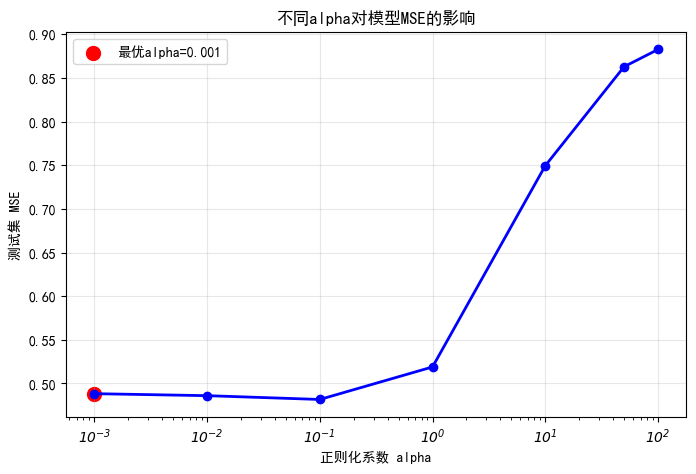

In [8]:
# ========== 对比原始LinearRegression ==========
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

print("\n===== 原始LinearRegression测试集评估 =====")
print(f"测试集 MSE：{lr_mse:.2f}")
print(f"测试集 R²：{lr_r2:.2f}")

# ========== 可视化超参数影响 ==========
alpha_list = [0.001, 0.01, 0.1, 1, 10, 50, 100]
mse_list = []

# 为alpha遍历添加进度条
print("\n===== 计算不同alpha的MSE =====")
for alpha in tqdm(alpha_list, desc="Alpha遍历进度", unit="个alpha"):
    temp_model = Ridge(alpha=alpha, fit_intercept=True, solver='auto')
    temp_model.fit(X_train, y_train)
    temp_pred = temp_model.predict(X_test)
    temp_mse = mean_squared_error(y_test, temp_pred)
    mse_list.append(temp_mse)

# 绘制可视化图
plt.figure(figsize=(8, 5))
plt.plot(alpha_list, mse_list, 'o-', color='blue', linewidth=2)
plt.xlabel("正则化系数 alpha")
plt.ylabel("测试集 MSE")
plt.title("不同alpha对模型MSE的影响")
plt.xscale('log')
plt.grid(alpha=0.3)
# 标注最优alpha
best_alpha = best_params['alpha']
best_mse_idx = alpha_list.index(best_alpha)
plt.scatter(best_alpha, mse_list[best_mse_idx], color='red', s=100, label=f'最优alpha={best_alpha}')
plt.legend()
plt.show()

2） 随机搜索  
在定义的参数空间内进行随机采样，找到最优参数组合

随机搜索进度: 100%|██████████| 50/50 [00:00<00:00, 486.40次/s]



===== 随机搜索结果 =====
总迭代次数：50
最优超参数：{'alpha': 0.0513, 'fit_intercept': True, 'solver': 'auto'}
训练集最优MSE：0.49

===== 最优模型测试集性能 =====
测试集MSE：0.48
测试集R²：0.46


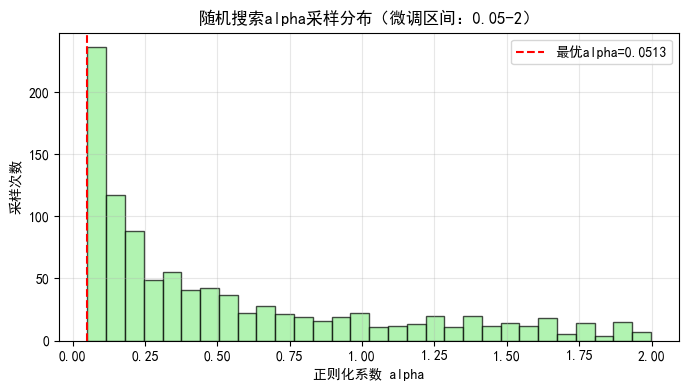

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, X_test, y_test):
    """评估模型性能，返回MSE和R²"""
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2
from scipy.stats import loguniform  # 对数均匀分布，适合正则化系数

# 参数空间设计：
# - alpha：聚焦0.05-2的微调区间（对数分布，覆盖网格搜索最优值附近）
# - fit_intercept：布尔值随机采样
# - solver：主流求解器随机采样
random_params_space = {
    'alpha': loguniform(0.05, 2),    # 核心微调参数：正则化强度
    'fit_intercept': [True, False],  # 是否拟合截距
    'solver': ['auto', 'svd', 'cholesky']  # 求解器
}

# 随机搜索配置
n_iter = 50  # 随机搜索迭代次数（远少于网格搜索的42+组，兼顾效率和效果）
np.random.seed(42)  # 固定随机种子，保证结果可复现

# 初始化最优参数/模型/分数
random_best_score = np.inf  
random_best_params = None
random_best_model = None

# 执行随机搜索

for _ in tqdm(range(n_iter), desc="随机搜索进度", unit="次"):
    # 随机采样参数
    alpha = random_params_space['alpha'].rvs()  # 对数分布采样alpha
    fit_intercept = np.random.choice(random_params_space['fit_intercept'])
    solver = np.random.choice(random_params_space['solver'])
    
    # 训练当前参数的模型
    temp_model = Ridge(
        alpha=alpha, 
        fit_intercept=fit_intercept, 
        solver=solver
    )
    temp_model.fit(X_train, y_train)
    
    # 计算训练集MSE
    train_pred = temp_model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_pred)
    train_neg_mse = train_mse  
    
    # 更新最优模型
    if train_neg_mse < random_best_score:
        random_best_score = train_neg_mse
        random_best_params = {
            'alpha': round(alpha, 4),  
            'fit_intercept': fit_intercept,
            'solver': solver
        }
        random_best_model = temp_model

# ========== 输出随机搜索结果 ==========
print("\n===== 随机搜索结果 =====")
print(f"总迭代次数：{n_iter}")
print(f"最优超参数：{random_best_params}")
print(f"训练集最优MSE：{random_best_score:.2f}")

# 评估最优模型在测试集的性能
test_mse, test_r2 = evaluate_model(random_best_model, X_test, y_test)
print("\n===== 最优模型测试集性能 =====")
print(f"测试集MSE：{test_mse:.2f}")
print(f"测试集R²：{test_r2:.2f}")

# ========== 可视化随机搜索的alpha采样分布 ==========
# 采样1000个alpha值，展示分布+最优值位置
alpha_samples = [random_params_space['alpha'].rvs() for _ in range(1000)]
plt.figure(figsize=(8, 4))
plt.hist(alpha_samples, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(
    random_best_params['alpha'], 
    color='red', linestyle='--', 
    label=f'最优alpha={random_best_params["alpha"]}'
)
plt.xlabel("正则化系数 alpha")
plt.ylabel("采样次数")
plt.title("随机搜索alpha采样分布（微调区间：0.05-2）")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

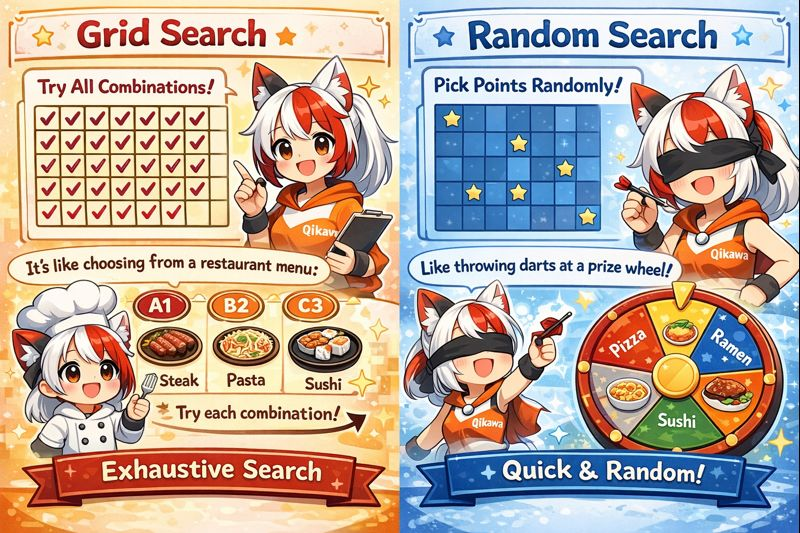

如上是对超参数进行寻优，那么针对一个任务我们是否可以对最优模型组合进行寻优？（这里按下不表）（不表3）

#### 上述几节已经基本介绍完了机器学习需要知道的基本知识  

lecture 0:介绍了我们建立模型时遇到的主要任务  
lecture 1：介绍了需要掌握的基础概念，并给了一个简单示例  
lecture 2: 介绍了梯度下降，即机器学习的核心算法  
lecture 3: 回收了几个不表，并介绍了模型的微调方法 

目前剩余不表；针对任务如何寻找最优模型组合  
下一章主要介绍回归任务，以及机器学习中主要的回归算法